In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False ## 正常显示负号

In [2]:
data_train = pd.read_csv('./data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 完整性分析
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 数值型数据描述分析
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 类别型数据描述性分析
data_train.select_dtypes('object').describe().T

,count,unique,top,freq
Name,891,891,"Greenfield, Mr. William Bertram",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


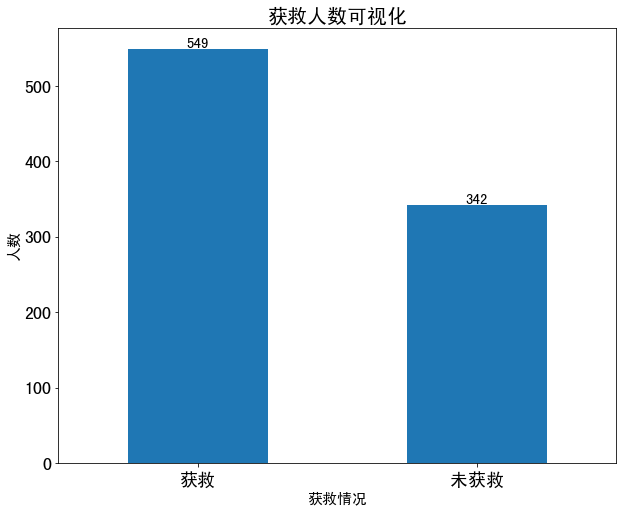

In [6]:
data_survived = data_train.Survived.value_counts()
data_survived.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.title('获救人数可视化', fontsize=20)
plt.xlabel('获救情况', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.xticks([0, 1], ['获救', '未获救'])
for a, b in zip(data_survived.index, data_survived.values):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

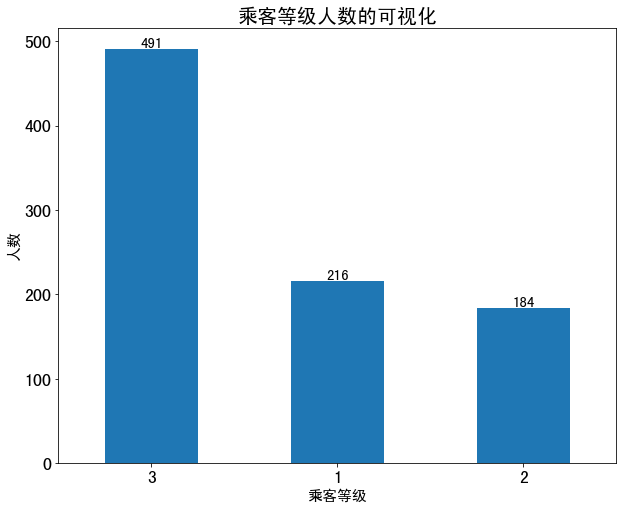

In [7]:
data_pclass = data_train.Pclass.value_counts()
data_pclass.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.title('乘客等级人数的可视化', fontsize=20)
plt.xlabel('乘客等级', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.xticks([0, 1, 2])
for a, b in zip([0, 1, 2], data_pclass.values):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

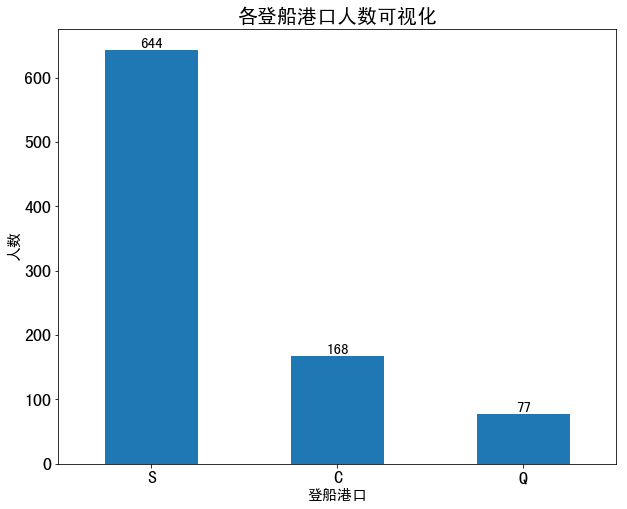

In [8]:
data_embarked = data_train.Embarked.value_counts()
data_embarked.plot(kind='bar', rot=0, figsize=(10, 8), fontsize=18)
plt.title('各登船港口人数可视化', fontsize=20)
plt.xlabel('登船港口', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.xticks([0, 1, 2])
for a, b in zip([0, 1, 2], data_embarked.values):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

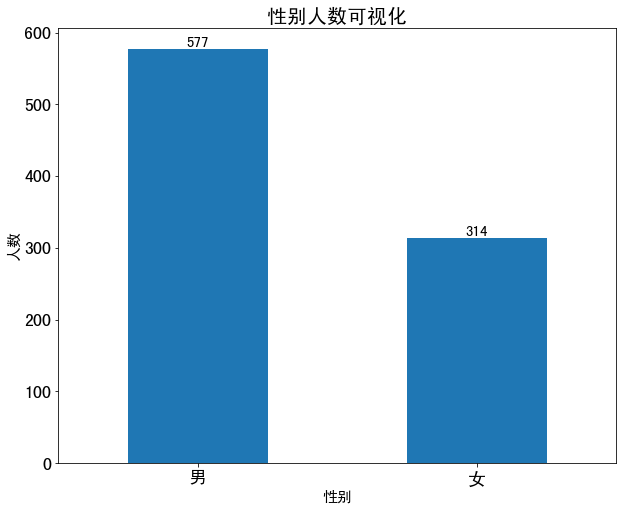

In [9]:
data_sex = data_train.Sex.value_counts()
data_sex.plot(kind='bar', rot=0, figsize=(10, 8), fontsize=18)
plt.title('性别人数可视化', fontsize=20)
plt.xlabel('性别', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.xticks([0, 1], ['男', '女'])
for a, b in zip([0, 1], data_sex.values):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

Text(0,0.5,'密度')

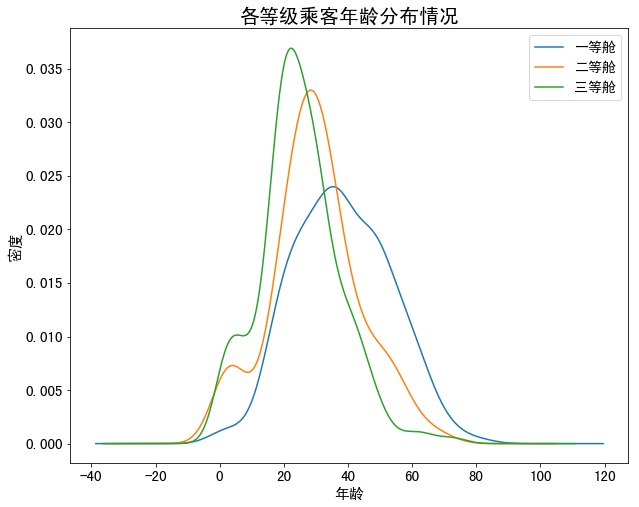

In [10]:
# 分析各等级乘客年龄分布情况
plt.figure(figsize=(10, 8))
data_train.Age[data_train.Pclass==1].plot(kind='kde', fontsize=15)
data_train.Age[data_train.Pclass==2].plot(kind='kde', fontsize=15)
data_train.Age[data_train.Pclass==3].plot(kind='kde', fontsize=15)
plt.legend(['一等舱', '二等舱', '三等舱'], fontsize=14)
plt.title('各等级乘客年龄分布情况', fontsize=20)
plt.xlabel('年龄', fontsize=15)
plt.ylabel('密度', fontsize=15)

In [11]:
data_train.Age[data_train.Pclass==1].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
data_train.Survived==0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

In [13]:
not_survived = data_train.Pclass[data_train.Survived == 0].value_counts()
not_survived

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [14]:
survived = data_train.Pclass[data_train.Survived == 1].value_counts()
survived

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [15]:
df_pclass = pd.DataFrame({'获救': survived, '未获救': not_survived})
df_pclass

,获救,未获救
1,136,80
2,87,97
3,119,372


In [16]:
# 查看各乘客等级的获救概率
rate_pclass = df_pclass['获救'] / (df_pclass['获救'] + df_pclass['未获救'])
rate_pclass = np.round(rate_pclass, 2)
df_pclass['rate_Pclass'] = rate_pclass
df_pclass

,获救,未获救,rate_Pclass
1,136,80,0.63
2,87,97,0.47
3,119,372,0.24


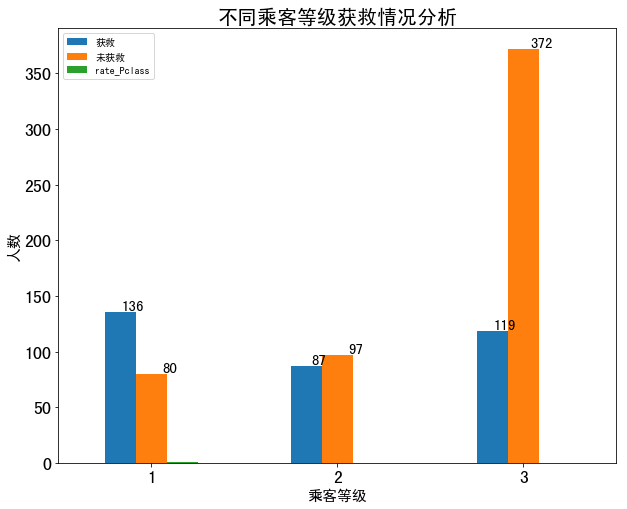

In [17]:
df_pclass.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.xlabel('乘客等级', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.title('不同乘客等级获救情况分析', fontsize=20)
for a, b in zip([0, 1, 2], df_pclass['未获救'].values):
    plt.text(a + 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)
for a, b in zip([0, 1, 2], df_pclass['获救'].values):
    plt.text(a - 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

In [18]:
survived_sex = data_train.Sex[data_train.Survived == 1].value_counts()
survived_sex

female    233
male      109
Name: Sex, dtype: int64

In [19]:
not_survived_sex = data_train.Sex[data_train.Survived == 0].value_counts()
not_survived_sex

male      468
female     81
Name: Sex, dtype: int64

In [20]:
df_sex = pd.DataFrame({'获救': survived_sex, '未获救': not_survived_sex})
df_sex

,获救,未获救
female,233,81
male,109,468


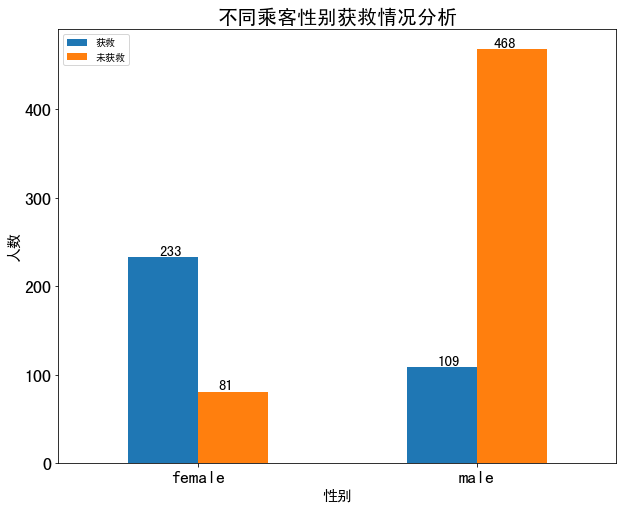

In [21]:
df_sex.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.xlabel('性别', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.title('不同乘客性别获救情况分析', fontsize=20)
for a, b in zip([0, 1], df_sex['未获救'].values):
    plt.text(a + 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)
for a, b in zip([0, 1], df_sex['获救'].values):
    plt.text(a - 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

In [22]:
rate_sex = df_sex['获救'] / (df_sex['获救'] + df_sex['未获救'])
rate_sex = np.round(rate_sex, 2)
df_sex['rate_sex'] = rate_sex
df_sex

,获救,未获救,rate_sex
female,233,81,0.74
male,109,468,0.19


In [23]:
survived_embarked = data_train.Embarked[data_train.Survived == 1].value_counts()
survived_embarked

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [24]:
not_survived_embarked = data_train.Embarked[data_train.Survived == 0].value_counts()
not_survived_embarked

S    427
C     75
Q     47
Name: Embarked, dtype: int64

In [25]:
df_embarked = pd.DataFrame({'获救': survived_embarked, '未获救': not_survived_embarked})
df_embarked

,获救,未获救
S,217,427
C,93,75
Q,30,47


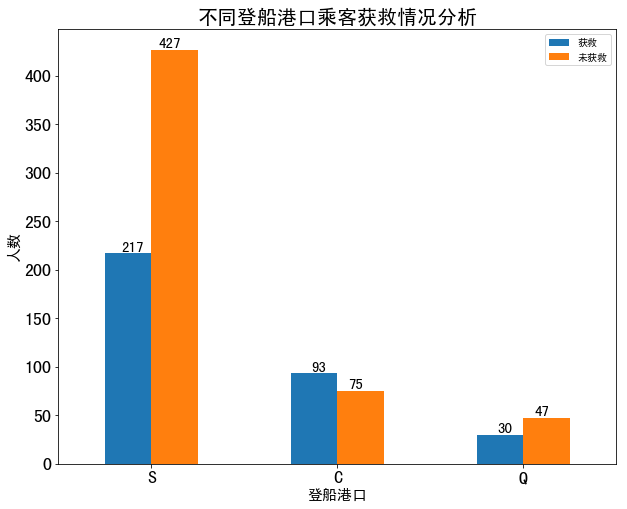

In [26]:
df_embarked.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.xlabel('登船港口', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.title('不同登船港口乘客获救情况分析', fontsize=20)
for a, b in zip([0, 1, 2], df_embarked['未获救'].values):
    plt.text(a + 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)
for a, b in zip([0, 1, 2], df_embarked['获救'].values):
    plt.text(a - 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

In [27]:
rate_embarked = df_embarked['获救'] / (df_embarked['获救'] + df_embarked['未获救'])
rate_embarked = np.round(rate_embarked, 2)
df_embarked['rate_embarked'] = rate_embarked
df_embarked

,获救,未获救,rate_embarked
S,217,427,0.34
C,93,75,0.55
Q,30,47,0.39


In [28]:
# 堂兄弟和父母字段对于获救情况分析
sib_data = data_train[data_train['SibSp'] != 0]
# sib_data
nosib_data = data_train[data_train['SibSp'] == 0]
# nosib_data
par_data = data_train[data_train['Parch'] != 0]
nopar_data = data_train[data_train['Parch'] == 0]

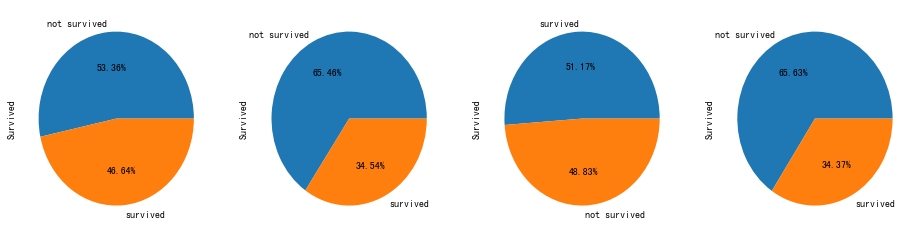

In [29]:
# 创建画布
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 4, 1)
sib_data['Survived'].value_counts().plot(kind='pie', labels=['not survived', 'survived'] , autopct='%.2f%%')
ax2 = fig.add_subplot(1, 4, 2)
nosib_data['Survived'].value_counts().plot(kind='pie', labels=['not survived', 'survived'] , autopct='%.2f%%')
ax3 = fig.add_subplot(1, 4, 3)
par_data['Survived'].value_counts().plot(kind='pie', labels=['survived', 'not survived'] , autopct='%.2f%%')
ax4 = fig.add_subplot(1, 4, 4)
nopar_data['Survived'].value_counts().plot(kind='pie', labels=['not survived', 'survived'] , autopct='%.2f%%')

In [30]:
# 有cabin记录的数据
cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
# survived_cabin
cabin_null = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
# not_survived_cabin
df_cabin = pd.DataFrame({'有客舱信息': cabin, '没有客舱信息': cabin_null})
df_cabin

,有客舱信息,没有客舱信息
0,68,481
1,136,206


In [31]:
df_cabin['有客舱信息']

0     68
1    136
Name: 有客舱信息, dtype: int64

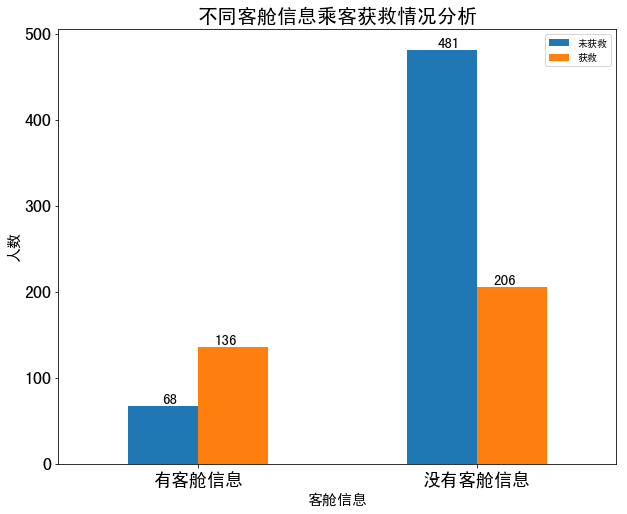

In [32]:
df_cabin.T.plot(kind='bar', rot=0, fontsize=18, figsize=(10, 8))
plt.xlabel('客舱信息', fontsize=15)
plt.ylabel('人数', fontsize=15)
plt.title('不同客舱信息乘客获救情况分析', fontsize=20)
# plt.xticks([0, 1], ['没有客舱信息', '有客舱信息'])
plt.legend(['未获救', '获救'])
for a, b in zip([0, 1], df_cabin.loc[0].values):
    plt.text(a - 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)
for a, b in zip([0, 1], df_cabin.loc[1].values):
    plt.text(a + 0.1, b, '%.0f' % b, ha='center', va='bottom', fontsize=15)

In [35]:
# 缺失数据处理
# 年龄
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
# 登船港口
data_train['Embarked'] = data_train['Embarked'].fillna('S')
# cabin客舱
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
data_train = set_cabin_type(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [40]:
data_train['Cabin'].value_counts()

No     687
Yes    204
Name: Cabin, dtype: int64

In [41]:
# 数据类型的转换 类别型数据转换为数值型
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

In [42]:
dummies_Sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [43]:
df = pd.concat(objs=[data_train, dummies_Cabin, dummies_Sex, dummies_Embarked, dummies_Pclass], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,1,0,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,1,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,1,0,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,1,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,1,0,0,1,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,1,1,0,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,1,0,1,0,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,1,0,1,1,0,0,1,0,0


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_No', 'Cabin_Yes',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [45]:
df.drop(['Pclass', 'Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [46]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,0,0,1


In [48]:
# 对于年龄和票价做标准化处理
a = df['Age']
df['Age_scaled'] = (a - a.mean()) / a.std()
f = df['Fare']
df['Fare_scaled'] = (f - f.mean()) / f.std()
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,1,-0.592148,-0.502163
1,2,1,38.0,1,0,71.2833,0,1,1,0,1,0,0,1,0,0,0.638430,0.786404
2,3,1,26.0,0,0,7.9250,1,0,1,0,0,0,1,0,0,1,-0.284503,-0.488580
3,4,1,35.0,1,0,53.1000,0,1,1,0,0,0,1,1,0,0,0.407697,0.420494
4,5,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,0,0,1,0.407697,-0.486064


In [49]:
df.drop(['Age', 'Fare'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,-0.592148,-0.502163
1,2,1,1,0,0,1,1,0,1,0,0,1,0,0,0.638430,0.786404
2,3,1,0,0,1,0,1,0,0,0,1,0,0,1,-0.284503,-0.488580
3,4,1,1,0,0,1,1,0,0,0,1,1,0,0,0.407697,0.420494
4,5,0,0,0,1,0,0,1,0,0,1,0,0,1,0.407697,-0.486064
